Capital Market Line(CML) - In the presence of a risk free asset, the efficient frontier becomes a straight line 
Maximum Sharp Ratio(MSR) 
	- The Tangency Portfolio is the portfolio that maximizes the sharp ratio 
	- A investors should hold a combination of the risk free asset and the portfolio that maximizes the reward-per-risk ratio

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()

In [4]:
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [9]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np
def msr(riskfree_rate, er, cov):
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n) #equal weights
    #constraits
    bounds = ((0.0,1.0),)*n  #tuple of tuple
    weights_sum_to_1 = {
        'type' : 'eq', #equal type; see function below
        'fun' : lambda weights: np.sum(weights) - 1
    }
    def neg_sharp_ratio(weights, riskfree_rate, er, cov): #Function within a function
        """
        Returns the negative of the sharp ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
    
    results = minimize(neg_sharp_ratio, #minimizing the negative of the sharp ratio = maxmizing the sharp ratio
                       init_guess,
                       args=(riskfree_rate,er,cov), method="SLSQP",
                       options={'disp':False}, #skip the displaying info
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

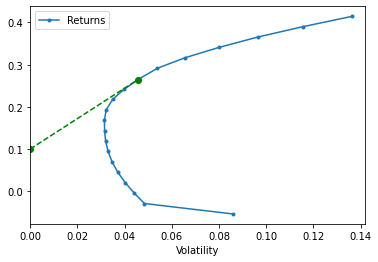

In [12]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0) #plotting from zero
rf = 0.1
w_msr = msr(rf,er,cov)
r_msr = erk.portfolio_return(w_msr,er)
vol_msr = erk.portfolio_vol(w_msr,cov)
# Add CML (Capital Market Line)
cml_x = [0,vol_msr]
cml_y = [rf,r_msr]
ax.plot(cml_x,cml_y,color="green",marker="o",linestyle="dashed")

.-


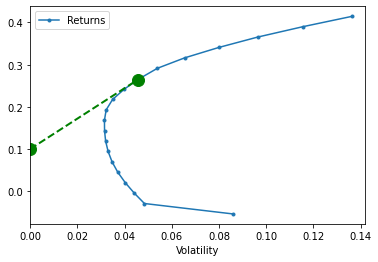

In [19]:
ax = erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1) #insert the function into erk